# Co2 Emission

## Model Building using ANN

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model

## 2. Load the Data

In [2]:
emission_data=pd.read_csv('Final_Emission_Data.csv')
emission_data.head()

,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb,co2_emissions
0,compact,2.0,4,Automatic with select shift,Premium gasoline,8.5,196.0
1,compact,2.4,4,Manual,Premium gasoline,9.6,221.0
2,compact,1.5,4,Continuously variable,Premium gasoline,5.9,136.0
3,suv - small,3.5,6,Automatic with select shift,Premium gasoline,11.1,255.0
4,suv - small,3.5,6,Automatic with select shift,Premium gasoline,10.6,244.0


In [3]:
# Converting Categorical variables to ordinal
oc = OrdinalEncoder()
cols = ['vehicle_class','transmission','fuel_type']
emission_data[cols] = oc.fit_transform(emission_data[cols])
emission_data.head()

,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb,co2_emissions
0,0.0,2.0,4,2.0,3.0,8.5,196.0
1,0.0,2.4,4,4.0,3.0,9.6,221.0
2,0.0,1.5,4,3.0,3.0,5.9,136.0
3,11.0,3.5,6,2.0,3.0,11.1,255.0
4,11.0,3.5,6,2.0,3.0,10.6,244.0


## 3. Model Building using ANN

In [4]:
X=emission_data.drop('co2_emissions', axis=1)
y=emission_data[['co2_emissions']]

In [5]:
X.shape, y.shape

((5981, 6), (5981, 1))

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=True)

In [7]:
X_train.shape, y_train.shape

((4784, 6), (4784, 1))

In [8]:
X_test.shape, y_test.shape

((1197, 6), (1197, 1))

### 3.1 Building Model Architecture

In [9]:
model=Sequential()
model.add(Dense(units=128, input_dim=6,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

### 3.2 Model Compilation

In [10]:
model.compile(optimizer='rmsprop',loss='mean_squared_error',metrics='mse')

## 4. Model Training

In [11]:
model_training=model.fit( x=X_train,y=y_train,batch_size=10,epochs=250, validation_data=(X_test, y_test))

Epoch 1/250
479/479 [==============================] - 3s 3ms/step - loss: 8058.4199 - mse: 8058.4199 - val_loss: 606.0037 - val_mse: 606.0037
Epoch 2/250
479/479 [==============================] - 1s 2ms/step - loss: 2900.5408 - mse: 2900.5408 - val_loss: 650.4436 - val_mse: 650.4435
Epoch 3/250
479/479 [==============================] - 1s 2ms/step - loss: 2877.4475 - mse: 2877.4475 - val_loss: 348.0547 - val_mse: 348.0547
Epoch 4/250
479/479 [==============================] - 1s 2ms/step - loss: 2881.2053 - mse: 2881.2053 - val_loss: 322.4798 - val_mse: 322.4798
Epoch 5/250
479/479 [==============================] - 1s 2ms/step - loss: 2812.5430 - mse: 2812.5425 - val_loss: 318.3491 - val_mse: 318.3491
Epoch 6/250
479/479 [==============================] - 1s 2ms/step - loss: 2966.3699 - mse: 2966.3701 - val_loss: 1434.9329 - val_mse: 1434.9329
Epoch 7/250
479/479 [==============================] - 1s 2ms/step - loss: 2715.6128 - mse: 2715.6128 - val_loss: 278.6327 - val_mse: 278.63

Epoch 58/250
479/479 [==============================] - 1s 2ms/step - loss: 2216.5742 - mse: 2216.5742 - val_loss: 168.1800 - val_mse: 168.1800
Epoch 59/250
479/479 [==============================] - 1s 2ms/step - loss: 2274.6702 - mse: 2274.6702 - val_loss: 818.0674 - val_mse: 818.0674
Epoch 60/250
479/479 [==============================] - 1s 2ms/step - loss: 2288.7200 - mse: 2288.7200 - val_loss: 273.0283 - val_mse: 273.0283
Epoch 61/250
479/479 [==============================] - 1s 2ms/step - loss: 2261.0598 - mse: 2261.0601 - val_loss: 191.0536 - val_mse: 191.0536
Epoch 62/250
479/479 [==============================] - 1s 2ms/step - loss: 2183.9568 - mse: 2183.9568 - val_loss: 151.0283 - val_mse: 151.0283
Epoch 63/250
479/479 [==============================] - 1s 2ms/step - loss: 2222.3010 - mse: 2222.3010 - val_loss: 135.0700 - val_mse: 135.0700
Epoch 64/250
479/479 [==============================] - 1s 2ms/step - loss: 2182.0024 - mse: 2182.0024 - val_loss: 368.6711 - val_mse: 3

Epoch 115/250
479/479 [==============================] - 1s 2ms/step - loss: 2055.4399 - mse: 2055.4399 - val_loss: 131.1681 - val_mse: 131.1681
Epoch 116/250
479/479 [==============================] - 1s 2ms/step - loss: 2108.4917 - mse: 2108.4917 - val_loss: 173.3196 - val_mse: 173.3196
Epoch 117/250
479/479 [==============================] - 1s 3ms/step - loss: 2028.7312 - mse: 2028.7312 - val_loss: 128.6425 - val_mse: 128.6425
Epoch 118/250
479/479 [==============================] - 1s 2ms/step - loss: 2020.5375 - mse: 2020.5375 - val_loss: 320.5989 - val_mse: 320.5989
Epoch 119/250
479/479 [==============================] - 1s 3ms/step - loss: 1961.4935 - mse: 1961.4935 - val_loss: 124.1130 - val_mse: 124.1130
Epoch 120/250
479/479 [==============================] - 1s 3ms/step - loss: 1932.3217 - mse: 1932.3217 - val_loss: 448.9515 - val_mse: 448.9515
Epoch 121/250
479/479 [==============================] - 1s 2ms/step - loss: 1946.5352 - mse: 1946.5352 - val_loss: 212.2985 - val

479/479 [==============================] - 1s 2ms/step - loss: 1785.9640 - mse: 1785.9642 - val_loss: 332.8677 - val_mse: 332.8677
Epoch 172/250
479/479 [==============================] - 1s 2ms/step - loss: 1818.8894 - mse: 1818.8894 - val_loss: 175.0244 - val_mse: 175.0244
Epoch 173/250
479/479 [==============================] - 1s 2ms/step - loss: 1770.1796 - mse: 1770.1793 - val_loss: 132.7031 - val_mse: 132.7031
Epoch 174/250
479/479 [==============================] - 1s 2ms/step - loss: 1772.9214 - mse: 1772.9214 - val_loss: 119.6754 - val_mse: 119.6754
Epoch 175/250
479/479 [==============================] - 1s 2ms/step - loss: 1708.0637 - mse: 1708.0637 - val_loss: 95.0763 - val_mse: 95.0763
Epoch 176/250
479/479 [==============================] - 1s 2ms/step - loss: 1721.0026 - mse: 1721.0026 - val_loss: 303.3756 - val_mse: 303.3756
Epoch 177/250
479/479 [==============================] - 1s 2ms/step - loss: 1773.4034 - mse: 1773.4034 - val_loss: 381.6535 - val_mse: 381.6535
E

479/479 [==============================] - 1s 2ms/step - loss: 1321.5658 - mse: 1321.5658 - val_loss: 261.3301 - val_mse: 261.3301
Epoch 228/250
479/479 [==============================] - 1s 2ms/step - loss: 1399.4325 - mse: 1399.4325 - val_loss: 172.8206 - val_mse: 172.8206
Epoch 229/250
479/479 [==============================] - 1s 2ms/step - loss: 1378.7634 - mse: 1378.7634 - val_loss: 323.8784 - val_mse: 323.8784
Epoch 230/250
479/479 [==============================] - 1s 2ms/step - loss: 1327.5305 - mse: 1327.5305 - val_loss: 130.4210 - val_mse: 130.4210
Epoch 231/250
479/479 [==============================] - 1s 2ms/step - loss: 1360.3230 - mse: 1360.3230 - val_loss: 275.0884 - val_mse: 275.0884
Epoch 232/250
479/479 [==============================] - 1s 2ms/step - loss: 1340.9438 - mse: 1340.9438 - val_loss: 103.3996 - val_mse: 103.3996
Epoch 233/250
479/479 [==============================] - 1s 2ms/step - loss: 1387.8663 - mse: 1387.8663 - val_loss: 465.3580 - val_mse: 465.3580

## 5. Model Performance

### Model Mean Squared Error Performance

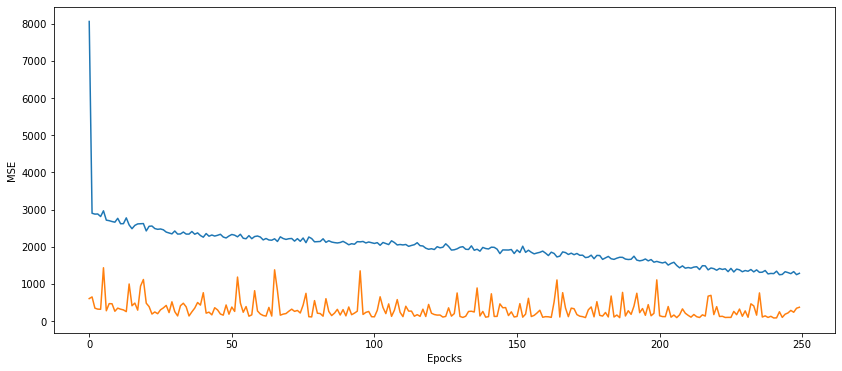

In [12]:
plt.figure(figsize=(14,6))
plt.plot(model_training.history['mse'], label='Train Performance')
plt.plot(model_training.history['val_mse'], label='Test Performance')

plt.xlabel('Epocks')
plt.ylabel('MSE')
plt.show()

### Model Loss Performance 

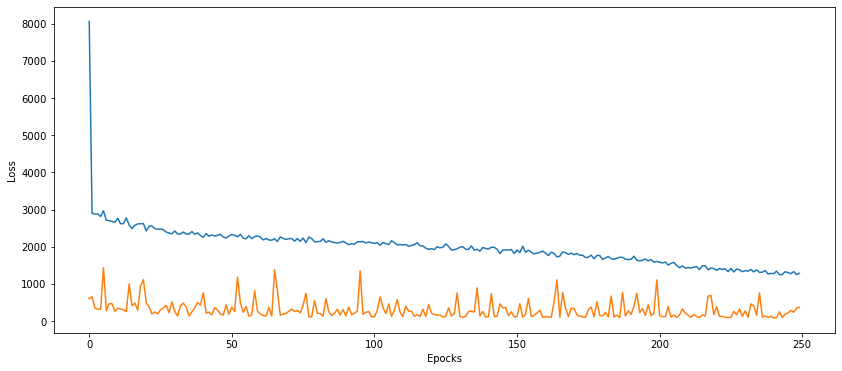

In [13]:
plt.figure(figsize=(14,6))
plt.plot(model_training.history['loss'], label='Train Loss')
plt.plot(model_training.history['val_loss'], label='Test Loss')

plt.xlabel('Epocks')
plt.ylabel('Loss')
plt.show()

## 6. Model Evaluation

In [14]:
model.evaluate(x=X_train, y=y_train)

150/150 [==============================] - 0s 2ms/step - loss: 376.2460 - mse: 376.2460


[376.2459716796875, 376.2459716796875]

In [15]:
model.evaluate(x=X_test, y=y_test)

38/38 [==============================] - 0s 2ms/step - loss: 372.7517 - mse: 372.7517


[372.751708984375, 372.751708984375]

## 7. Model Prediction

In [16]:
y_pred=model.predict(X_test)

In [17]:
y_test.iloc[[3]]

,co2_emissions
5891,167.0


In [18]:
print('The predicted model for index no 3 for test data is',y_pred[3])

The predicted model for index no 3 for test data is [157.30916]


## 8. Model Deployment

In [19]:
# Deploying the intelligence
model.save('ANN_Model.h5')

In [20]:
# Loading the pre-trained model
loaded_model=load_model('ANN_Model.h5')

In [21]:
y_pred_load=loaded_model.predict(X_test)

In [22]:
y_test.iloc[[5]]

,co2_emissions
4186,344.0


In [23]:
print('The predicted model for index no 5 for test data is',y_pred_load[5])

The predicted model for index no 5 for test data is [303.5843]


## 9. User Interface Platform

In [24]:
df=pd.read_csv('Final_Emission_Data.csv')
df.head()

,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb,co2_emissions
0,compact,2.0,4,Automatic with select shift,Premium gasoline,8.5,196.0
1,compact,2.4,4,Manual,Premium gasoline,9.6,221.0
2,compact,1.5,4,Continuously variable,Premium gasoline,5.9,136.0
3,suv - small,3.5,6,Automatic with select shift,Premium gasoline,11.1,255.0
4,suv - small,3.5,6,Automatic with select shift,Premium gasoline,10.6,244.0


In [25]:
i1 = input("Enter vehicle class :")
i2 = float(input("Enter engine size :"))
i3 = float(input("Enter Number of cylinders :"))
i4 = input("Enter Transmission type :")
i5 = input("Enter Fuel type :")
i6 = float(input("Enter the combined fuel consumption rating (55% city, 45% highway), in L/100 km :"))

input_data = pd.DataFrame({'vehicle_class':i1,'engine_size':i2,'cylinders':i3,
                           'transmission':i4,'fuel_type':i5,
                           'fuel_consumption_comb(l/100km)':i6},index=[1])

input_data['vehicle_class']  =input_data['vehicle_class'].map({'compact':0.0,'full-size':1.0,'mid-size':2.0,'minicompact':3.0,'minivan':4.0,
                                                               'pickup truck - small':5.0,'pickup truck - standard':6.0,'special purpose vehicle':7.0,
                                                               'station wagon - mid-size':8.0,'station wagon - small':9.0,'subcompact':10.0,
                                                               'suv - small':11.0, 'suv - standard':12.0,'two-seater':13.0,'van - cargo':14.0,
                                                               'van - passenger':15.0})
input_data['transmission']  =input_data['transmission'].map({'Automatic':0.0,'Automated manual':1.0,'Automatic with select shift':2.0,'Continuously variable':3.0,'Manual':4.0})
input_data['fuel_type']  =input_data['fuel_type'].map({'Diesel':0.0,'Ethanol (E85)':1.0,'Natural gas':2.0,'Premium gasoline':3.0,'Regular gasoline':4.0})

pred =loaded_model.predict(input_data)
print("The Co2 emmitted from your car is {} in grams per kilometer.".format(pred))

Enter vehicle class :compact
Enter engine size :2
Enter Number of cylinders :4
Enter Transmission type :Automatic with select shift
Enter Fuel type :Premium gasoline
Enter the combined fuel consumption rating (55% city, 45% highway), in L/100 km :8.5
The Co2 emmitted from your car is [[190.49585]] in grams per kilometer.
